In [108]:
import os
from openai import OpenAI
from dotenv import load_dotenv


load_dotenv(verbose=True) # verbose: .env 파일 누락 등의 경고 메시지를 출력할 것인지에 대한 옵션


client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY')

In [109]:
!pip install python-dotenv
!pip install pykrx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [110]:
from pykrx import stock
import matplotlib.pyplot as plt
import json

In [127]:
for ticker in stock.get_market_ticker_list():
    종목 = stock.get_market_ticker_name(ticker)
    print(ticker, 종목)

095570 AJ네트웍스
006840 AK홀딩스
027410 BGF
282330 BGF리테일
138930 BNK금융지주
001460 BYC
001465 BYC우
001040 CJ
079160 CJ CGV
00104K CJ4우(전환)
000120 CJ대한통운
011150 CJ씨푸드
011155 CJ씨푸드1우
001045 CJ우
097950 CJ제일제당
097955 CJ제일제당 우
000480 CR홀딩스
000590 CS홀딩스
012030 DB
016610 DB금융투자
005830 DB손해보험
000990 DB하이텍
139130 DGB금융지주
001530 DI동일
000210 DL
000215 DL우
375500 DL이앤씨
37550L DL이앤씨2우(전환)
37550K DL이앤씨우
007340 DN오토모티브
004840 DRB동일
155660 DSR
069730 DSR제강
017860 DS단석
017940 E1
365550 ESR켄달스퀘어리츠
383220 F&F
007700 F&F홀딩스
114090 GKL
078930 GS
006360 GS건설
001250 GS글로벌
007070 GS리테일
078935 GS우
499790 GS피앤엘
012630 HDC
039570 HDC랩스
089470 HDC현대EP
294870 HDC현대산업개발
009540 HD한국조선해양
267250 HD현대
267270 HD현대건설기계
443060 HD현대마린솔루션
071970 HD현대마린엔진
010620 HD현대미포
322000 HD현대에너지솔루션
042670 HD현대인프라코어
267260 HD현대일렉트릭
329180 HD현대중공업
097230 HJ중공업
014790 HL D&I
003580 HLB글로벌
204320 HL만도
060980 HL홀딩스
011200 HMM
035000 HS애드
002460 HS화성
487570 HS효성
298050 HS효성첨단소재
003560 IHQ
175330 JB금융지주
234080 JW생명과학
001060 JW중외제약
001067 JW중외제약2우B
0010

In [112]:
df = stock.get_market_ohlcv("20220720", "20220810", "005930")
df = df.assign(종목='삼성전자자', 종목코드='005930')

In [113]:
df.head()

,시가,고가,저가,종가,거래량,등락률,종목,종목코드
날짜,,,,,,,,
2022-07-20,61800,62100,60500,60500,16782238,-0.656814,삼성전자자,005930
2022-07-21,61100,61900,60700,61800,12291374,2.148760,삼성전자자,005930
2022-07-22,61800,62200,61200,61300,10261310,-0.809061,삼성전자자,005930
2022-07-25,60900,61900,60800,61100,9193681,-0.326264,삼성전자자,005930
2022-07-26,60800,61900,60800,61700,6597211,0.981997,삼성전자자,005930


In [114]:
df.tail()

,시가,고가,저가,종가,거래량,등락률,종목,종목코드
날짜,,,,,,,,
2022-08-04,61700,61800,61200,61500,9125439,0.326264,삼성전자자,005930
2022-08-05,61700,61900,61200,61500,9567620,0.000000,삼성전자자,005930
2022-08-08,61400,61400,60600,60800,11313150,-1.138211,삼성전자자,005930
2022-08-09,60600,60700,59600,60000,18251170,-1.315789,삼성전자자,005930
2022-08-10,58900,59200,58600,59100,18084349,-1.500000,삼성전자자,005930


In [115]:
df.columns

Index(['시가', '고가', '저가', '종가', '거래량', '등락률', '종목', '종목코드'], dtype='object')

In [124]:
# '거래량' 열에서 최고값을 가진 전체 행 찾기
max_trading_volume_row = df.loc[df['거래량'].idxmax()]
print(max_trading_volume_row)

시가         60600
고가         60700
저가         59600
종가         60000
거래량     18251170
등락률    -1.315789
종목         삼성전자자
종목코드      005930
Name: 2022-08-09 00:00:00, dtype: object


In [117]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


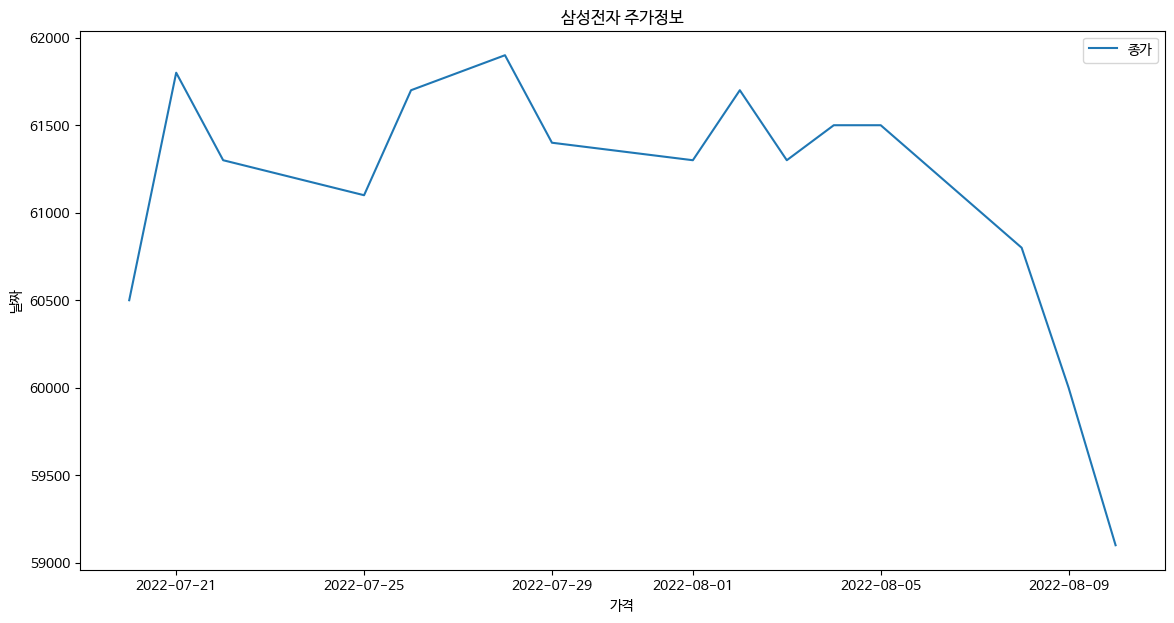

In [143]:
plt.figure(figsize=(14, 7))
plt.plot(df['종가'], label='종가')
plt.title("삼성전자 주가정보")
plt.xlabel("가격")
plt.ylabel("날짜")
plt.legend()
plt.show()

In [169]:
def stock_info(stock_name):

    company_df = df
    stock_info = {
        "stock_name":stock_name,
    }
    return json.dumps(stock_info)

In [170]:
messages = [{"role": "user", "content": "삼성전자 주가정보 좀 알려줘줘."}]
functions = [
    {
        "name": "stock_info",
        "description": "데이터를 기반으로 주가가정보를 알려줍니다.",
        "parameters": {
            "type": "object",
            "properties": {
                "stock_name": {
                    "type": "string",
                    "description": "업체명. ex) 삼성전자자",
                },
                "explain": {
                    "type": "string",
                    "description": "업체 대표표 상품. ex) TV, 스마트폰폰",
                },
                "price_trend": {
                    "type": "string", 
                    "description": """전체 자료중 최고가와 날짜. ex) YYYY-MM-DD, xxxx원
                                    전체 자료중 최저저가와 날짜. ex) YYYY-MM-DD, xxxx원""",
                },
                "price_analysis": {
                    "type": "string", 
                    "description": """전체 자료중 최다 거래량과과 날짜. ex) YYYY-MM-DD, xxxx주, 
                                    전체 자료중 최저 거래량과 날짜. ex) YYYY-MM-DD, xxxx주""",
                },
            },
            "required": ["stock_name", "explain", "price_trend", "price_analysis"],
        },
    }
]

In [173]:
messages = [{"role": "user", "content": "삼성전자 주가정보 좀 알려줘줘."}]
functions = [
    {
        "name": "stock_info",
        "description": "데이터를 기반으로 주가가정보를 알려줍니다.",
        "parameters": {
            "type": "object",
            "properties": {
                "stock_info": {
                    "type": "string",
                    "description": "업체명. ex) 삼성전자자, SK하이닉스스",
                },
            },
            "required": ["stock_name", "explain", "price_trend", "price_analysis"],
        },
    }
]

In [174]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    functions=functions,
    function_call="auto",
    temperature=0
    )
response_message = response.choices[0].message
print(response_message)

ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=None, function_call=FunctionCall(arguments='{"stock_info":"삼성전자"}', name='stock_info'), tool_calls=None)


In [175]:
if response_message.function_call is not None:
    # Note: the JSON response may not always be valid; be sure to handle errors
    available_functions = {
        "stock_info": stock_info,
    }
    function_name = response_message.function_call.name
    function_to_call = available_functions[function_name]
    function_args = json.loads(response_message.function_call.arguments)
    function_response = function_to_call(
        stock_name=function_args["stock_info"],
    )

    messages.append(response_message)
    messages.append(
        {
            "role": "function",
            "name": function_name,
            "content": function_response,
        }
    )
    second_response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
    )  # get a new response from GPT where it can see the function response

    print(second_response.choices[0].message.content)

KeyError: 'stock_name'